<a href="https://colab.research.google.com/github/ana-ddomingues/gs_segsemestre/blob/main/GlobalSolution_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_eventos_extremos.csv to dataset_eventos_extremos (1).csv


# **PROJETO: Previsão de Eventos Naturais Extremos com Redes Neurais**

In [ ]:
# PASSO 2 - Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# PASSO 3 - Carregar o dataset
nome_arquivo = list(uploaded.keys())[0]  # Pega o nome do arquivo enviado
df = pd.read_csv(nome_arquivo)

# Verificar colunas e primeiras linhas
print("Colunas disponíveis:", df.columns.tolist())
print(df.head())


Colunas disponíveis: ['data', 'localidade', 'tipo_evento', 'precipitacao_mm', 'nivel_rio_m', 'umidade_solo_%', 'temperatura_C', 'evento_extremo']
         data    localidade   tipo_evento  precipitacao_mm  nivel_rio_m  \
0  2023-05-30        Manaus      incêndio              118         0.67   
1  2023-12-24        Manaus      enchente               26         1.94   
2  2022-04-18  Porto Alegre          seca              123         8.05   
3  2022-07-03     São Paulo  deslizamento                0         6.89   
4  2022-01-07        Recife  deslizamento               15         0.84   

   umidade_solo_%  temperatura_C evento_extremo  
0              53           41.8            não  
1              23           40.1            não  
2              56           29.5            não  
3              85           38.0            não  
4              77           28.2            não  


In [ ]:
# PASSO 4 - Limpar e preparar a coluna 'evento_extremo'

# Converter para string, tirar espaços e minúsculas
df["evento_extremo"] = df["evento_extremo"].astype(str).str.strip().str.lower()

# Mostrar valores únicos antes do mapeamento
print("Valores únicos em 'evento_extremo':", df["evento_extremo"].unique())

# Mapear 'sim' para 1 e 'não' para 0, outros valores virarão NaN
df["evento_extremo"] = df["evento_extremo"].map({"sim": 1, "não": 0})

# Contar valores ausentes após o mapeamento
print("Quantidade de NaN em 'evento_extremo' após mapeamento:", df["evento_extremo"].isna().sum())

# Remover linhas onde 'evento_extremo' é NaN
df = df.dropna(subset=["evento_extremo"])

# Converter para inteiro
df["evento_extremo"] = df["evento_extremo"].astype(int)


Valores únicos em 'evento_extremo': ['não' 'sim']
Quantidade de NaN em 'evento_extremo' após mapeamento: 0


In [ ]:
# PASSO 5 - Tratar variáveis categóricas que serão usadas como features

# Listar colunas categóricas que precisam ser codificadas (ajuste conforme seu dataset)
colunas_categoricas = []

# Exemplo: se tiver "tipo_evento" e "localidade" no dataset
if "tipo_evento" in df.columns:
    colunas_categoricas.append("tipo_evento")
if "localidade" in df.columns:
    colunas_categoricas.append("localidade")

# Codificar cada uma usando LabelEncoder
for col in colunas_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
# PASSO 6 - Separar variáveis preditoras e alvo

# Remover colunas irrelevantes ou não numéricas (exemplo: 'data')
colunas_para_remover = ["evento_extremo", "data"]
X = df.drop(columns=[col for col in colunas_para_remover if col in df.columns], errors='ignore')
y = df["evento_extremo"]

# Verificar se ainda há NaN em y
print("Quantidade de NaN em y (alvo):", y.isna().sum())

# PASSO 7 - Dividir dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirmar que não existem NaN em y_train
print("NaN em y_train:", y_train.isna().sum())

# PASSO 8 - Treinar modelo de Rede Neural MLP

modelo = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)


Quantidade de NaN em y (alvo): 0
NaN em y_train: 0


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


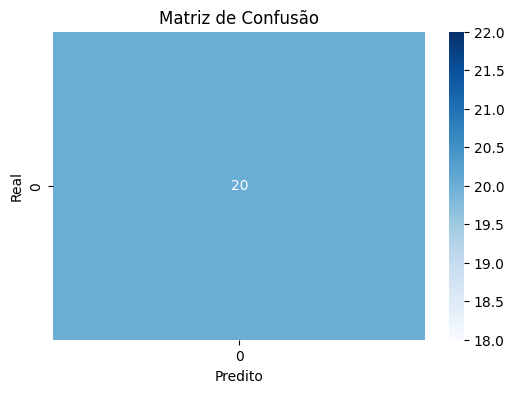

In [ ]:
# PASSO 9 - Avaliar o modelo

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = modelo.predict(X_test)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


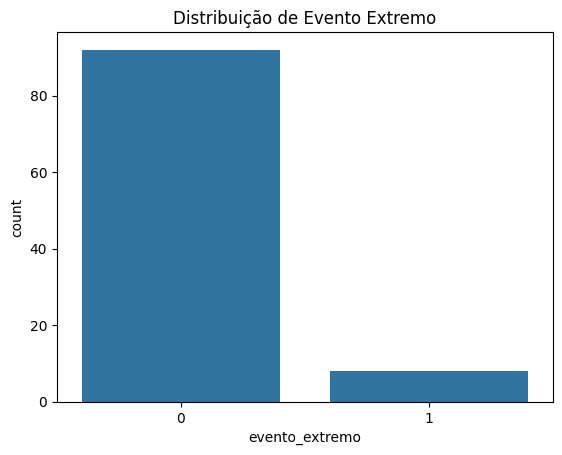

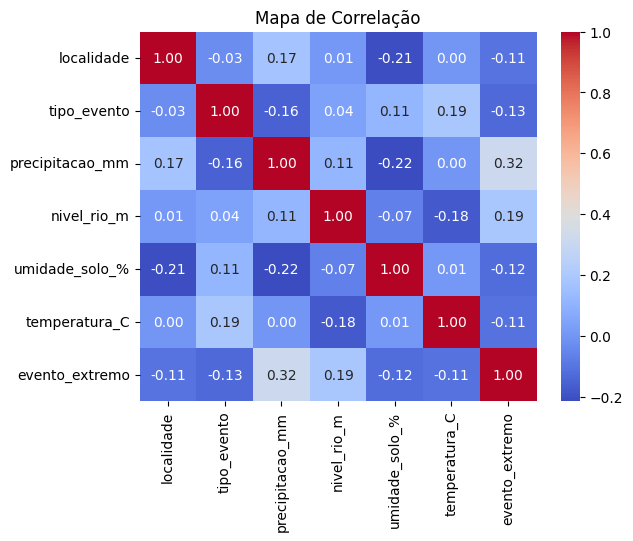

In [ ]:
# Distribuição do alvo
sns.countplot(x="evento_extremo", data=df)
plt.title("Distribuição de Evento Extremo")
plt.show()

# Correlações numéricas
# Remover colunas não numéricas antes de calcular correlação
df_corr = df.select_dtypes(include=["number"])

# Visualizar matriz de correlação
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()



**Mapa de Correlação**

A matriz de correlação que mostra como cada variável está relacionada com as outras. Os valores vão de:
+1 → correlação positiva perfeita (as variáveis aumentam juntas)
0  → sem correlação
–1 → correlação negativa perfeita (quando uma sobe, a outra desce)

As cores ajudam a visualizar:
🔴 vermelho = correlação forte positiva
🔵 azul escuro = correlação negativa
⚪ branco = sem correlação

| Variável          | Correlação com `evento_extremo` | Interpretação                                                              |
| ----------------- | ------------------------------- | -------------------------------------------------------------------------- |
| `precipitacao_mm` | **0.32** (positiva moderada)    | **Aumentos de chuva estão associados com maior chance de evento extremo.** |
| `nivel_rio_m`     | 0.19                            | Nível do rio também pode indicar risco de eventos, como enchentes.         |
| `tipo_evento`     | -0.13                           | Baixa correlação, mas pode ajudar se codificado corretamente.              |
| `umidade_solo_%`  | -0.12                           | Pode ter influência em eventos como seca ou deslizamento.                  |
| `temperatura_C`   | -0.11                           | Baixa correlação direta, mas pode combinar com outras variáveis.           |
| `localidade`      | -0.11                           | Muito fraca, talvez mais útil como agrupamento/região.                     |



**Principais insights:**

✅ precipitacao_mm é a variável mais correlacionada com evento_extremo, o que faz sentido (muita chuva → enchente ou deslizamento).

✅ nivel_rio_m também é relevante, indicando que o modelo pode usar isso como sinal de risco.

⚠️ Variáveis como temperatura_C e umidade_solo_% têm correlação baixa, mas ainda podem ser úteis em combinação com outras (não devem ser descartadas sem testes).

❌ localidade tem correlação negativa fraca, pode ser melhor tratada como agrupamento ou dummy variable (variáveis categóricas).
